In [33]:
import numpy as np
import pandas as pd

## Se toma el primer dataframe

In [34]:
df = pd.read_csv('DespulpeFinal.csv')  

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Marca temporal                                                     132 non-null    object 
 1   Fecha                                                              131 non-null    object 
 2   Guanábanas del Samán                                               101 non-null    float64
 3   Guanábanas de la Casa                                              24 non-null     float64
 4   Guanábanas del Rin                                                 41 non-null     float64
 5   Guanábanas del Caracolí                                            72 non-null     float64
 6   Guanábanas de Roma 2                                               86 non-null     float64
 7   Guanábanas del Almendro   

## Procesos de limpieza

In [36]:
df.drop(columns=['Marca temporal', 'Guanábanas del Samán', 'Guanábanas de la Casa', 'Guanábanas del Rin' , 
                 'Guanábanas del Caracolí', 'Guanábanas de Roma 2', 'Guanábanas del Almendro', 'Guanábanas de Sorrento 1',
                 'Guanábanas de Las Nubes', 'Peso promedio por Guanábana', 'Rendimiento', 'Cantidad de bolsas empacadas, cuantas CON PEPA y cuantas SIN PEPA',
                 'Horas empleadas para la labor', 'Kilos de pulpa por Hora'], inplace=True)

In [37]:
df.drop(columns=['Comentarios'], inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Fecha                                                  131 non-null    object
 1   Total de Guanábanas                                    135 non-null    object
 2   Peso de las guanábanas en gramos ANTES de despulpar    138 non-null    object
 3   Peso de las guanábanas en gramos DESPUÉS de despulpar  136 non-null    object
dtypes: object(4)
memory usage: 4.7+ KB


In [39]:
df = df.rename(columns={'Peso de las guanábanas en gramos ANTES de despulpar': 'Peso ANTES'})
df = df.rename(columns={'Peso de las guanábanas en gramos DESPUÉS de despulpar': 'Peso DESPUÉS'})

In [40]:
df['Peso ANTES'].info()
df['Peso DESPUÉS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 145 entries, 0 to 144
Series name: Peso ANTES
Non-Null Count  Dtype 
--------------  ----- 
138 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 145 entries, 0 to 144
Series name: Peso DESPUÉS
Non-Null Count  Dtype 
--------------  ----- 
136 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [41]:
df = df.drop(index=114)

In [42]:
df = df.iloc[:133]
# Remove commas from 'Peso ANTES' and 'Peso DESPUÉS' and convert to numeric
df['Peso ANTES'] = pd.to_numeric(df['Peso ANTES'].str.replace(',', '.'))#, errors='coerce'
df['Peso DESPUÉS'] = pd.to_numeric(df['Peso DESPUÉS'].str.replace(',', '.'))#, errors='coerce'

# Drop rows with NaN values in these columns
df = df.dropna(subset=['Peso ANTES', 'Peso DESPUÉS'])


## Correlación entre las variables antes y después de despulpar

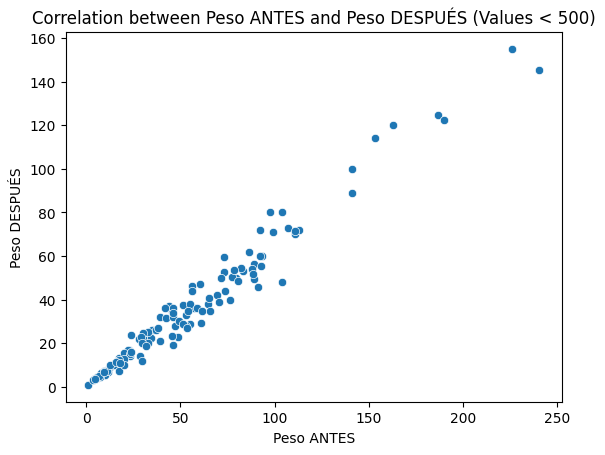

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df[(df['Peso ANTES'] < 500) & (df['Peso DESPUÉS'] < 500)]


sns.scatterplot(x='Peso ANTES', y='Peso DESPUÉS', data=filtered_df)
plt.title('Correlation between Peso ANTES and Peso DESPUÉS (Values < 500)')
plt.xlabel('Peso ANTES')
plt.ylabel('Peso DESPUÉS')
plt.show()

Hay otras variables que influyen en el rendimiento, pero de esas variables no hay datos (como cantidad de guanábanas con hongo y cantidad de guanábanas que no maduran de manera homogenea)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 130
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fecha                130 non-null    object 
 1   Total de Guanábanas  130 non-null    object 
 2   Peso ANTES           130 non-null    float64
 3   Peso DESPUÉS         130 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.1+ KB


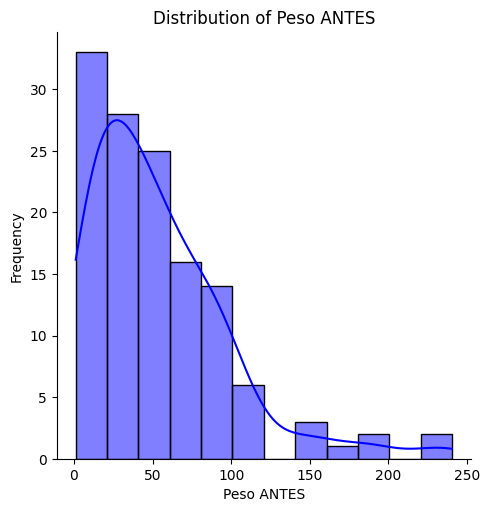

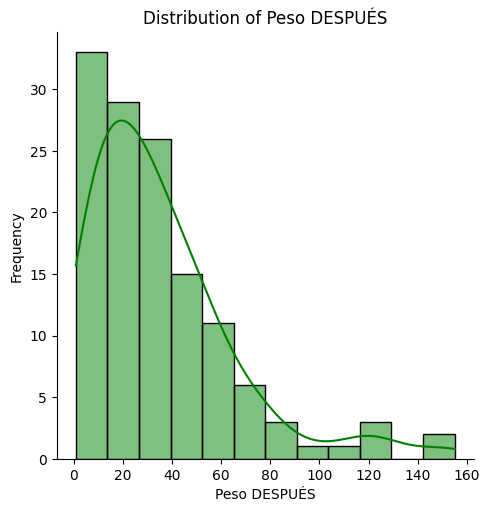

In [45]:
sns.displot(filtered_df['Peso ANTES'], kde=True, color='blue')
plt.title('Distribution of Peso ANTES')
plt.xlabel('Peso ANTES')
plt.ylabel('Frequency')
plt.show()

sns.displot(filtered_df['Peso DESPUÉS'], kde=True, color='green')
plt.title('Distribution of Peso DESPUÉS')
plt.xlabel('Peso DESPUÉS')
plt.ylabel('Frequency')
plt.show()

# Dataframe Polinización

In [46]:
dfP = pd.read_csv('PolinizaciónFinal.csv')

In [47]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marca temporal                        417 non-null    object 
 1   Día de embolse o polnización          418 non-null    object 
 2   Cantidad de erizos embolsados         185 non-null    float64
 3   Color de cinta utilizada al embolsar  184 non-null    object 
 4   Lotes en donde se embolsó             186 non-null    object 
 5   Cantidad de flores polinizadas        288 non-null    float64
 6   Lotes en donde se polinizó            288 non-null    object 
 7   Labor                                 417 non-null    object 
dtypes: float64(2), object(6)
memory usage: 26.4+ KB


## Procesos de limpieza

In [48]:
dfP.drop(columns=['Marca temporal'], inplace=True)
dfP.drop(columns=['Color de cinta utilizada al embolsar'], inplace=True)
dfP.drop(columns=['Labor'], inplace=True)
dfP.drop(columns=['Lotes en donde se embolsó'], inplace=True)
dfP.drop(columns=['Lotes en donde se polinizó'], inplace=True)

dfP = dfP.rename(columns={'Día de embolse o polnización': 'Fecha'})


In [49]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fecha                           418 non-null    object 
 1   Cantidad de erizos embolsados   185 non-null    float64
 2   Cantidad de flores polinizadas  288 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.0+ KB


In [50]:
dfP['Fecha'] = dfP['Fecha'].replace('5324', pd.NA)

## 1er Problema, varias registros para una fecha, pero esto no es un error

In [51]:
print(dfP['Fecha'].value_counts())

Fecha
17/12/2024    6
20/08/2024    5
16/08/2024    5
13/08/2024    5
24/09/2024    5
             ..
29/04/2025    1
1/05/2025     1
30/04/2025    1
7/05/2025     1
14/05/2025    1
Name: count, Length: 180, dtype: int64


## Solución al problema
se agruparon los registros de una sola fecha para que quedaran en una sola fila, por lo que se redujo el dataframe y como estamos tratando de predecir inicialmente los kilos totales de pulpa, no se tienen en cuenta los lotes que son los que separaban los registros en varias filas de una misma fecha

In [52]:
dfP['Fecha'] = pd.to_datetime(dfP['Fecha'], dayfirst=True)  
dfP = dfP.groupby('Fecha').sum().reset_index()

In [53]:
print(display(dfP))

,Fecha,Cantidad de erizos embolsados,Cantidad de flores polinizadas
0,2024-07-05,13.0,0.0
1,2024-07-09,0.0,15.0
2,2024-07-10,0.0,80.0
3,2024-07-11,0.0,26.0
4,2024-07-12,0.0,22.0
...,...,...,...
175,2025-05-01,170.0,0.0
176,2025-05-07,105.0,0.0
177,2025-05-08,120.0,0.0
178,2025-05-13,180.0,0.0


None


## Método muy importante para generar una correlación entre la polinización y el embolse con la producción
### Entonces se tomaron en cuenta la cantidad de polinizaciones y embolses dentro de un rango que puede haber sido el causante de la producción del momento en el que se procesó la fruta

In [54]:
def corr_polinizacion(fecha):
    fecha_inicio = fecha - pd.DateOffset(days=210)
    fecha_fin = fecha - pd.DateOffset(days=165)
    mask = (dfP['Fecha'] >= fecha_inicio) & (dfP['Fecha'] <= fecha_fin)
    return dfP.loc[mask, 'Cantidad de flores polinizadas'].sum()

def corr_embolse(fecha):
    fecha_inicio = fecha - pd.DateOffset(days=150)
    fecha_fin = fecha - pd.DateOffset(days=90)
    mask = (dfP['Fecha'] >= fecha_inicio) & (dfP['Fecha'] <= fecha_fin)
    return dfP.loc[mask, 'Cantidad de erizos embolsados'].sum()

## Y por último aplicamos esto al primer dataframe de la producción y el procesamiento de la fruta dentro de dos nuevas columnas

In [55]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)#, errors='coerce'

df['Correlación Polinización'] = df['Fecha'].apply(corr_polinizacion)
df['Correlación Embolse'] = df['Fecha'].apply(corr_embolse)

In [56]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)

,Fecha,Total de Guanábanas,Peso ANTES,Peso DESPUÉS,Correlación Polinización,Correlación Embolse
0,2024-08-30,17,51.629,37.669,0.0,0.0
1,2024-09-02,5,15.185,11.079,0.0,0.0
2,2024-09-06,10,30.370,22.158,0.0,0.0
3,2024-09-10,4,12.148,8.863,0.0,0.0
4,2024-09-24,2,4.800,3.502,0.0,0.0
5,2024-10-01,4,8.800,6.420,0.0,0.0
6,2024-10-08,4,12.800,9.339,0.0,13.0
7,2024-10-20,1,4.400,3.800,0.0,13.0
8,2024-11-03,1,6.000,4.000,0.0,13.0
9,2024-11-13,3,6.247,4.657,0.0,53.0


In [57]:
print(df.isnull())

     Fecha  Total de Guanábanas  Peso ANTES  Peso DESPUÉS  \
0    False                False       False         False   
1    False                False       False         False   
2    False                False       False         False   
3    False                False       False         False   
4    False                False       False         False   
..     ...                  ...         ...           ...   
126  False                False       False         False   
127  False                False       False         False   
128  False                False       False         False   
129  False                False       False         False   
130  False                False       False         False   

     Correlación Polinización  Correlación Embolse  
0                       False                False  
1                       False                False  
2                       False                False  
3                       False                False  
4 

In [58]:
dfAumentado = df.copy()
df_sample = dfAumentado.sample(n=390, replace=True)#aca me toco ponerle el replace true para q permitiera repetir filas
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_sample)

,Fecha,Total de Guanábanas,Peso ANTES,Peso DESPUÉS,Correlación Polinización,Correlación Embolse
122,2025-05-08,7,18.000,11.000,3441.0,3447.0
25,2024-12-11,10,35.000,26.250,0.0,289.0
101,2025-04-07,24,53.100,28.000,2590.0,2550.0
33,2024-12-31,12,45.300,35.000,246.0,605.0
8,2024-11-03,1,6.000,4.000,0.0,13.0
47,2025-01-16,13,39.000,32.000,358.0,1517.0
98,2025-04-02,37,103.900,48.000,2270.0,2519.0
8,2024-11-03,1,6.000,4.000,0.0,13.0
40,2025-01-08,11,33.000,25.200,306.0,889.0
86,2025-03-14,32,80.500,48.600,1560.0,2652.0


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# --- 1. Preprocesamiento ---

# Suponiendo que tu DataFrame se llama df
# Extraer características de la fecha
df_sample['Fecha'] = pd.to_datetime(df_sample['Fecha'], dayfirst=True)
df_sample['Año'] = df_sample['Fecha'].dt.year
df_sample['Mes'] = df_sample['Fecha'].dt.month
df_sample['Día'] = df_sample['Fecha'].dt.day
df_sample['DíaSemana'] = df_sample['Fecha'].dt.dayofweek

# Seleccionar variables predictoras y objetivo
features = [
    'Peso ANTES',
    'Correlación Polinización',
    'Correlación Embolse',
    'Total de Guanábanas',
    'Año', 'Mes', 'Día', 'DíaSemana'
]
X = df_sample[features]
y = df_sample['Peso DESPUÉS']

# # Opcional: Si hay valores nulos, los rellenamos o eliminamos
# X = X.fillna(0)#nosotrso ya tenemos valores limpios
# y = y.fillna(0)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(df_sample)


# --- 2. División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#que sería mejor en este caso con o sin random state?, y mirar el test size que tan grande o pequeño lo ponemos

# --- 3. Entrenamiento del modelo ---
model = RandomForestRegressor(n_estimators=100, max_depth=20)
model.fit(X_train, y_train)

# --- 4. Evaluación ---
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")

# --- 5. Predicción de ejemplo ---
ejemplo = X_test.iloc[0:130]#hay q preguntar q es este iloc[0:1]
prediccion = model.predict(ejemplo)#hay q mirar q hace el .predict
print("Predicción para el primer ejemplo de test:", prediccion)
media = np.mean(prediccion)
desviacion = np.std(prediccion)
varianza = np.var(prediccion)

print(f"Promedio (media): {media:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Varianza: {varianza:.2f}")

MAE: 1.00
RMSE: 2.01
R2: 1.00
MAPE: 3.37%
Predicción para el primer ejemplo de test: [ 15.368    10.2695   25.848    11.322    54.181    14.352    28.842
 114.843    50.526    12.46995 120.       20.587    15.7      27.3925
  53.127     3.49     36.008    22.547    45.73195  15.424    31.869
  43.362    35.984    16.845   124.9      55.764    31.275    70.
  53.233    16.807   124.9       9.55691   3.7241   30.379    41.87707
  89.31     48.24     31.275    19.855    71.287     4.        7.04255
   6.47038  16.845    12.499   114.843    60.       52.208    15.7
  69.79     23.72082  37.18378  22.8295   43.362    71.287    22.24662
   0.9      53.187    22.56756  14.352    36.86369  15.424    31.293
  79.36     31.869     6.47038  15.424    22.56756  53.233    22.24662
  56.129    30.379   144.749    41.215    52.063     5.72887  36.853
  41.732  ]
Promedio (media): 39.01
Desviación estándar: 31.54
Varianza: 995.05


In [61]:
ejemplo
#No entiendo es pq salen 78 filas y no 130. 

,Peso ANTES,Correlación Polinización,Correlación Embolse,Total de Guanábanas,Año,Mes,Día,DíaSemana
75,28.5,1945.0,2485.0,10,2025,2,28,4
103,20.2,2676.0,3124.0,5,2025,4,10,3
25,35.0,0.0,289.0,10,2024,12,11,2
92,15.8,1465.0,2123.0,6,2025,3,21,4
54,83.0,883.0,1582.0,24,2025,1,22,2
...,...,...,...,...,...,...,...,...
121,70.3,3809.0,3482.0,22,2025,5,6,1
111,76.1,3610.0,3080.0,28,2025,4,23,2
17,9.8,0.0,106.0,2,2024,11,30,5
61,57.1,1833.0,1856.0,19,2025,2,3,0


In [62]:
from sklearn.linear_model import LinearRegression

# Entrenamiento
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R2: {r2_lr:.2f}")
print(f"MAPE: {mape_lr:.2f}%")

ejemplo = X_test.iloc[0:130]#hay q preguntar q es este iloc[0:1]
prediccion1 = lr_model.predict(ejemplo)#hay q mirar q hace el .predict
print("Predicción para el ejemplo de regresión lineal:", prediccion1)
media1 = np.mean(prediccion1)
desviacion1 = np.std(prediccion1)
varianza1 = np.var(prediccion1)

print(f"Promedio (media): {media1:.2f}")
print(f"Desviación estándar: {desviacion1:.2f}")
print(f"Varianza: {varianza1:.2f}")


--- Regresión Lineal ---
MAE: 3.32
RMSE: 4.66
R2: 0.98
MAPE: 12.94%
Predicción para el ejemplo de regresión lineal: [ 17.19198142   9.16407717  24.97468668   9.62512405  57.98902413
  15.41009975  28.64271148 102.80050174  52.57889827  14.25046964
 113.29290355  21.4967907   16.33965401  23.73058036  55.11064861
   0.67002855  33.15212853  25.19903289  42.53335703  13.5335742
  37.95356719  41.05517613  35.98658977  18.0410312  125.1371112
  53.3910419   26.79759591  74.0208914   48.19271851  13.10777748
 125.1371112   10.91348098   4.82926376  32.2689918   39.10632322
  95.91144983  66.92715658  26.79759591  14.05295727  68.8437622
   5.71220158   9.35543347   7.19306197  18.0410312   14.92300494
 102.80050174  61.07479387  54.1922488   16.33965401  71.55834502
  20.18403991  37.30989999  23.64574688  41.05517613  68.8437622
  22.48675239   1.90180125  50.76477094  24.29069309  15.41009975
  34.92486751  13.5335742   29.48530198  66.84523036  37.95356719
   7.19306197  13.5335742   2

In [63]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Entrenamiento
sk_xgb_model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
sk_xgb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_skxgb = sk_xgb_model.predict(X_test)
mae_skxgb = mean_absolute_error(y_test, y_pred_skxgb)
rmse_skxgb = np.sqrt(mean_squared_error(y_test, y_pred_skxgb))
r2_skxgb = r2_score(y_test, y_pred_skxgb)
mape_skxgb = mean_absolute_percentage_error(y_test, y_pred_skxgb)

print("\n--- HistGradientBoostingRegressor (scikit-learn) ---")
print(f"MAE: {mae_skxgb:.2f}")
print(f"RMSE: {rmse_skxgb:.2f}")
print(f"R2: {r2_skxgb:.2f}")
print(f"MAPE: {mape_skxgb:.2f}%")

ejemplo = X_test.iloc[0:130]
prediccion2 = sk_xgb_model.predict(ejemplo)
print("Predicción para el ejemplo de HistGradientBoostingRegressor:", prediccion2)
media2 = np.mean(prediccion2)
desviacion2 = np.std(prediccion2)
varianza2 = np.var(prediccion2)

print(f"Promedio (media): {media2:.2f}")
print(f"Desviación estándar: {desviacion2:.2f}")
print(f"Varianza: {varianza2:.2f}")


--- HistGradientBoostingRegressor (scikit-learn) ---
MAE: 1.31
RMSE: 2.35
R2: 0.99
MAPE: 6.02%
Predicción para el ejemplo de HistGradientBoostingRegressor: [ 15.66574865   9.66007312  26.21525079  10.9379337   55.53894441
  14.08779135  29.07536029 118.40043075  48.16630827  13.50826835
 120.80987769  21.01962951  15.60830772  26.44602562  51.39121495
   4.06895959  37.26200213  22.27178828  45.94816606  13.49484951
  32.42797288  45.61842494  40.58255643  17.54017921 127.37424384
  55.80201186  31.12300339  70.49320478  53.90090427  15.72994939
 127.37424384  10.8834681    4.23771819  30.14322094  43.6153792
  88.09581479  49.76262603  31.12300339  19.80606732  71.19054264
   4.22805949   7.61594136   6.21892461  17.54017921  13.60822342
 118.40043075  59.92510666  53.40841885  15.60830772  71.85131755
  24.33715246  37.90245936  23.36670667  45.61842494  71.19054264
  23.22358061   1.60115842  51.63756608  23.08495449  14.08779135
  38.04788057  13.49484951  30.67110705  79.78575659

In [64]:
from xgboost import XGBRegressor

# Entrenamiento
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\n--- XGBoost Regressor ---")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R2: {r2_xgb:.2f}")
print(f"MAPE: {mape_xgb:.2f}%")

ejemplo = X_test.iloc[0:20]#hay q preguntar q es este iloc[0:1]
prediccion2 = xgb_model.predict(ejemplo)#hay q mirar q hace el .predict
print("Predicción para el  ejemplo de xgboost:", prediccion2)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Total de Guanábanas: object